# Data fuzzification on real datasets

# Pre-configuration

In [1]:
# Path
import sys
import os
qprc_path = os.path.abspath(os.path.join('..'))
if qprc_path not in sys.path:
    sys.path.append(qprc_path)

# Fuzzifying the Iris data set

In this block, we use the `FuzzyData` class in a real dataset: the Iris dataset from Scikit-Learn.

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from kernelfuzzy.fuzzyset import FuzzySet
from kernelfuzzy.fuzzification import FuzzyData
 
#from https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset/46379878#46379878
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

iris_data = sklearn_to_df(load_iris())
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


(150, 4)


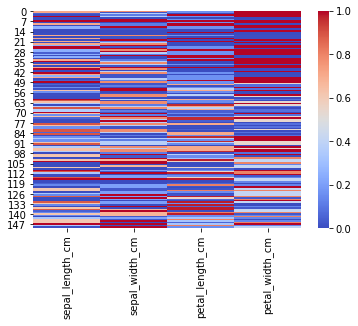

In [6]:
import numpy as np
import seaborn as sns

iris_fuzzy_data = FuzzyData(data=iris_data, target='target')
iris_fuzzy_data.quantile_fuzzification_classification()

print(iris_fuzzy_data.get_fuzzydata().shape)
ax = sns.heatmap(iris_fuzzy_data.get_epistemic_values(),cmap="coolwarm")

# Fuzzifying the Wine data set

In this block, we use the `FuzzyData` class in a real dataset: the Wine dataset from Scikit-Learn.

In [4]:
from sklearn.datasets import load_wine
wine_data = sklearn_to_df(load_wine())
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


(178, 13)


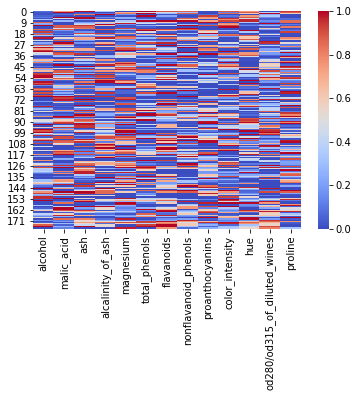

In [5]:
wine_fuzzy_data=FuzzyData(data=wine_data, target='target')
wine_fuzzy_data.quantile_fuzzification_classification()

print(wine_fuzzy_data.get_fuzzydata().shape)
ax = sns.heatmap(wine_fuzzy_data.get_epistemic_values(),cmap="coolwarm")